<a href="https://colab.research.google.com/github/d0artG/Page-View-Time-Series-Visualizer/blob/main/testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [5]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col=0, parse_dates = True, names=["date","views"], header=0)

df

,views
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [6]:
# Clean data
df = df.drop(df[(df['views'] > df['views'].quantile(0.975)) |(df['views'] < df['views'].quantile(0.025))].index)
df

,views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [7]:
def draw_line_plot():
    # Draw line plot
    fig,ax=plt.subplots()
    ax=plt.plot(df.index,df["views"])
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

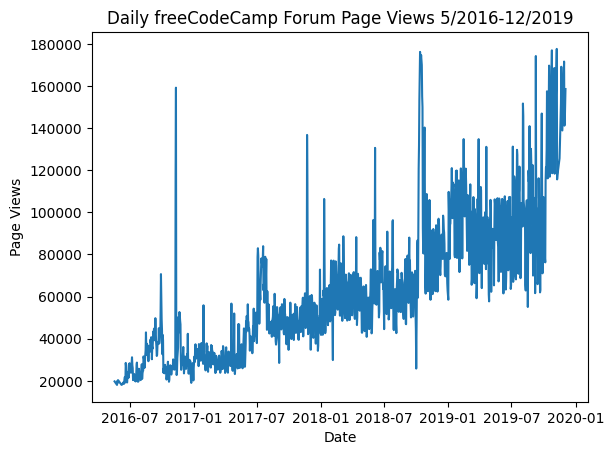

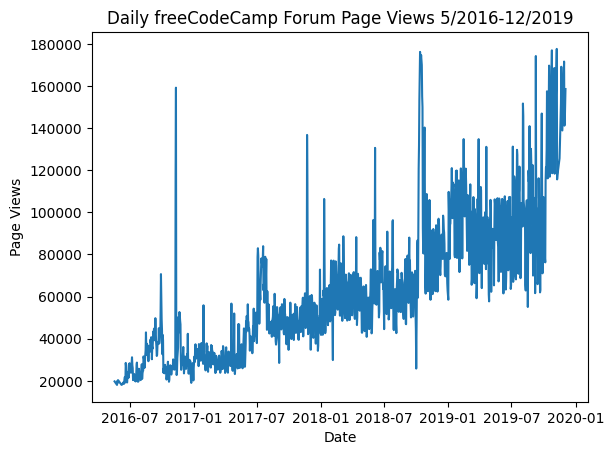

In [8]:
draw_line_plot()

In [9]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar=df
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month_name()
    df_bar=df_bar.groupby(["year","month"]).mean().reset_index()

    # Draw bar plot
    fig,ax=plt.subplots()
    ax=sns.barplot(data=df_bar, x="year",y="views", hue="month", hue_order=["January", "February", "March", "April","May", "June", "July", "August", "September", "October", "November", "December"])
    ax.set(xlabel='Years', ylabel='Average Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

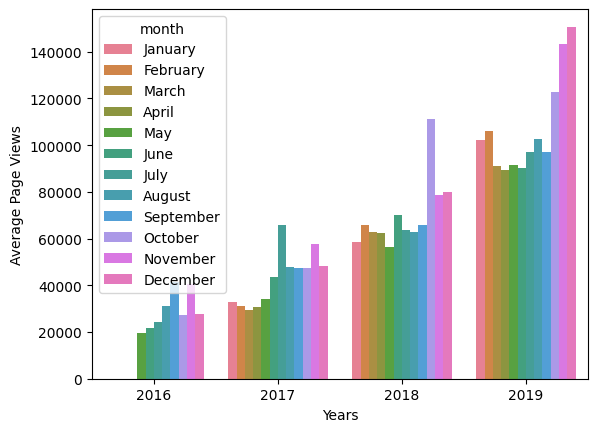

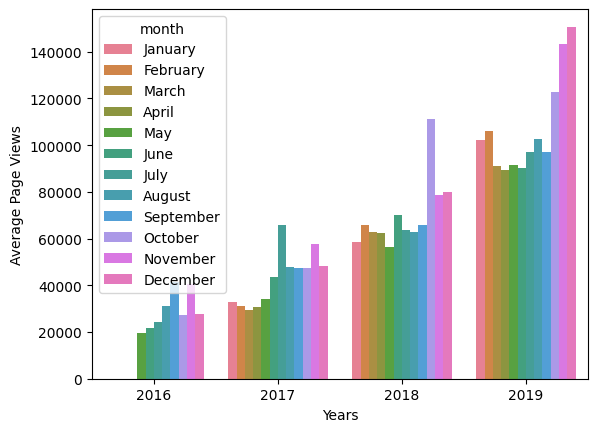

In [10]:
draw_bar_plot()

In [19]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.value_counts("month")

month
Aug    122
Jul    120
Sep    120
Oct    112
Jun    107
Nov    104
May     98
Dec     95
Jan     93
Mar     93
Apr     90
Feb     84
Name: count, dtype: int64

<ipython-input-64-8e793c62f501>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x="year", y="views", ax=ax[0], palette="pastel")
<ipython-input-64-8e793c62f501>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x="month", y="views", order=month_order, ax=ax[1], palette="pastel")


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

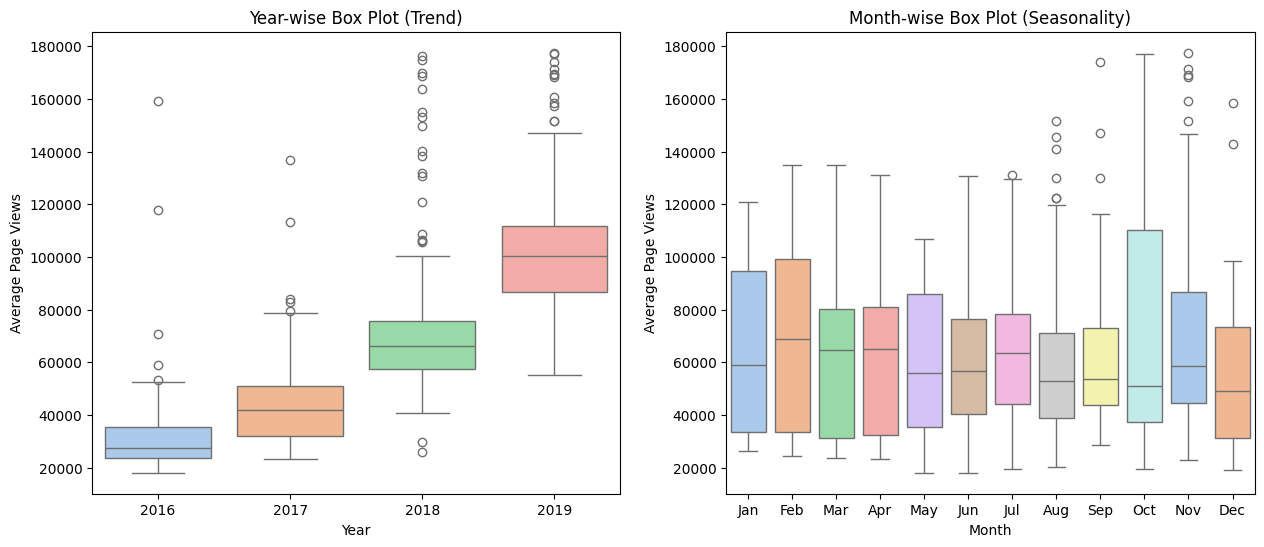

In [64]:
month_order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.boxplot(data=df_box, x="year", y="views", ax=ax[0], palette="pastel")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Average Page Views")
ax[0].set_title("Year-wise Box Plot (Trend)")
sns.boxplot(data=df_box, x="month", y="views", order=month_order, ax=ax[1], palette="pastel")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Average Page Views")
ax[1].set_title("Month-wise Box Plot (Seasonality)")